In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [425]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [426]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [427]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [428]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

Exploratory Data Analysis on GreenhouseClimate Dataset

In [451]:
grhc_df=data['GreenhouseClimate']
grhc_df.shape

(286854, 50)

In [452]:
grhc_df.head(10)

%time AssimLight BlackScr CO2air Cum_irr EC_drain_PC EnScr HumDef  \
0  43815.00000          0       35    439     0.5         3.6    96    7.0   
1  43815.00347          0       85    459     0.7         3.6    96    7.4   
2  43815.00694          0       96    461     0.7         3.6    95    6.0   
3  43815.01042          0       92    465     0.7         3.6    95    6.6   
4  43815.01389          0       92    467     0.7         3.6    95    7.0   
5  43815.01736          0       96    457     0.7         3.6    96    6.9   
6  43815.02083          0       94    464     0.7         3.6    95    6.3   
7  43815.02431          0       94    467     0.7         3.6    95    6.6   
8  43815.02778          0       96    465     0.7         3.6    96    6.9   
9  43815.03125          0       96    464     0.7         3.6    96    7.2   

  PipeGrow PipeLow  ... t_rail_min_sp t_rail_min_vip t_vent_sp  t_ventlee_vip  \
0      0.0    50.9  ...           NaN            0.0       NaN           25.0   
1      0.0    49.3  ...           NaN            0.0       NaN           25.0   
2      0.0    47.6  ...           NaN            0.0       NaN           25.0   
3      0.0    46.1  ...           NaN            0.0       NaN           25.0   
4      0.0    45.2  ...           NaN            0.0       NaN           25.0   
5      0.0    44.0  ...           NaN            0.0       NaN           25.0   
6      0.0    43.6  ...           NaN            0.0       NaN           25.0   
7      0.0    44.3  ...           NaN            0.0       NaN           25.0   
8      0.0    45.1  ...           NaN            0.0       NaN           25.0   
9      0.0    44.0  ...           NaN            0.0       NaN           25.0   

  t_ventwind_vip water_sup water_sup_intervals_sp_min  \
0           26.0       4.0                        NaN   
1           26.0       6.0                        NaN   
2           26.0       6.0                        NaN   
3           26.0       6.0                        NaN   
4           26.0       6.0                        NaN   
5           26.0       6.0                        NaN   
6           26.0       6.0                        NaN   
7           26.0       6.0                        NaN   
8           26.0       6.0                        NaN   
9           26.0       6.0                        NaN   

  water_sup_intervals_vip_min window_pos_lee_sp window_pos_lee_vip  
0                        1000               NaN                1.2  
1                        1000               NaN                1.2  
2                        1000               NaN                1.2  
3                        1000               NaN                1.2  
4                        1000               NaN                1.2  
5                        1000               NaN                1.2  
6                        1000               NaN                1.2  
7                        1000               NaN                1.2  
8                        1000               NaN                1.2  
9                        1000               NaN                1.2  

[10 rows x 50 columns]

In [453]:
grhc_df.rename(columns = {'%time':'Time',}, inplace = True)

In [454]:
grhc_df["Time"]= pd.to_datetime(grhc_df["Time"])

In [455]:
grhc_df.info

<bound method DataFrame.info of                                 Time AssimLight BlackScr CO2air Cum_irr  \
0      1970-01-01 00:00:00.000043815          0       35    439     0.5   
1      1970-01-01 00:00:00.000043815          0       85    459     0.7   
2      1970-01-01 00:00:00.000043815          0       96    461     0.7   
3      1970-01-01 00:00:00.000043815          0       92    465     0.7   
4      1970-01-01 00:00:00.000043815          0       92    467     0.7   
...                              ...        ...      ...    ...     ...   
286849 1970-01-01 00:00:00.000043980          0        0    479     4.7   
286850 1970-01-01 00:00:00.000043980          0        0    485     4.7   
286851 1970-01-01 00:00:00.000043980          0        0    465     4.7   
286852 1970-01-01 00:00:00.000043980          0        0    470     4.7   
286853 1970-01-01 00:00:00.000043981        NaN      NaN    NaN     NaN   

       EC_drain_PC EnScr HumDef PipeGrow PipeLow  ... t_rail_min_sp

In [456]:
grhc_df.describe()

Tot_PAR_Lamps
count  286854.000000
mean       94.727991
std        94.199725
min         0.000000
25%         0.000000
50%       100.000000
75%       197.000000
max       197.000000

In [457]:
grhc_df.columns

Index(['Time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip'],
      dtype='object')

In [458]:
grhc_df.dtypes

Time                           datetime64[ns]
AssimLight                             object
BlackScr                               object
CO2air                                 object
Cum_irr                                object
EC_drain_PC                            object
EnScr                                  object
HumDef                                 object
PipeGrow                               object
PipeLow                                object
Rhair                                  object
Tair                                   object
Tot_PAR                                object
Tot_PAR_Lamps                           int64
VentLee                                object
Ventwind                               object
assim_sp                               object
assim_vip                              object
co2_dos                                object
co2_sp                                 object
co2_vip                                object
dx_sp                             

In [459]:
res_grhc=list(grhc_df.columns.values)
res_grhc.remove('Time')

In [460]:
grhc_df.nunique()

Time                            167
AssimLight                        4
BlackScr                        102
CO2air                         1249
Cum_irr                         263
EC_drain_PC                     111
EnScr                           102
HumDef                          241
PipeGrow                        510
PipeLow                         563
Rhair                           665
Tair                            266
Tot_PAR                        1008
Tot_PAR_Lamps                    98
VentLee                         102
Ventwind                        102
assim_sp                         18
assim_vip                        56
co2_dos                         193
co2_sp                         1084
co2_vip                        1090
dx_sp                           128
dx_vip                          122
int_blue_sp                     171
int_blue_vip                    235
int_farred_sp                    10
int_farred_vip                   16
int_red_sp                  

In [461]:
grhc_df.duplicated().sum()

141

In [462]:
grhc_df.isnull().sum()

Time                           0
AssimLight                     0
BlackScr                       0
CO2air                         0
Cum_irr                        0
EC_drain_PC                    0
EnScr                          0
HumDef                         0
PipeGrow                       0
PipeLow                        0
Rhair                          0
Tair                           0
Tot_PAR                        0
Tot_PAR_Lamps                  0
VentLee                        0
Ventwind                       0
assim_sp                       0
assim_vip                      0
co2_dos                        0
co2_sp                         0
co2_vip                        0
dx_sp                          0
dx_vip                         0
int_blue_sp                    0
int_blue_vip                   0
int_farred_sp                  0
int_farred_vip                 0
int_red_sp                     0
int_red_vip                    0
int_white_sp                   0
int_white_

In [463]:
grhc_df.replace(np.nan,'0',inplace = True)

In [464]:
grhc_df.isnull().sum()

Time                           0
AssimLight                     0
BlackScr                       0
CO2air                         0
Cum_irr                        0
EC_drain_PC                    0
EnScr                          0
HumDef                         0
PipeGrow                       0
PipeLow                        0
Rhair                          0
Tair                           0
Tot_PAR                        0
Tot_PAR_Lamps                  0
VentLee                        0
Ventwind                       0
assim_sp                       0
assim_vip                      0
co2_dos                        0
co2_sp                         0
co2_vip                        0
dx_sp                          0
dx_vip                         0
int_blue_sp                    0
int_blue_vip                   0
int_farred_sp                  0
int_farred_vip                 0
int_red_sp                     0
int_red_vip                    0
int_white_sp                   0
int_white_

In [468]:
grhc_df.columns

Index(['Time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip'],
      dtype='object')

In [469]:
grhc_df.dtypes

Time                           datetime64[ns]
AssimLight                             object
BlackScr                               object
CO2air                                 object
Cum_irr                                object
EC_drain_PC                            object
EnScr                                  object
HumDef                                 object
PipeGrow                               object
PipeLow                                object
Rhair                                  object
Tair                                   object
Tot_PAR                                object
Tot_PAR_Lamps                           int64
VentLee                                object
Ventwind                               object
assim_sp                               object
assim_vip                              object
co2_dos                                object
co2_sp                                 object
co2_vip                                object
dx_sp                             

In [470]:
for i in res_grhc:
    grhc_df[i] = grhc_df[i].astype(float)

In [471]:
grhc_df.dtypes

Time                           datetime64[ns]
AssimLight                            float64
BlackScr                              float64
CO2air                                float64
Cum_irr                               float64
EC_drain_PC                           float64
EnScr                                 float64
HumDef                                float64
PipeGrow                              float64
PipeLow                               float64
Rhair                                 float64
Tair                                  float64
Tot_PAR                               float64
Tot_PAR_Lamps                         float64
VentLee                               float64
Ventwind                              float64
assim_sp                              float64
assim_vip                             float64
co2_dos                               float64
co2_sp                                float64
co2_vip                               float64
dx_sp                             

In [472]:
corelation=grhc_df.corr()
corelation

AssimLight  BlackScr    CO2air   Cum_irr  \
AssimLight                     1.000000  0.101152  0.428083 -0.340768   
BlackScr                       0.101152  1.000000  0.041918 -0.352317   
CO2air                         0.428083  0.041918  1.000000 -0.273152   
Cum_irr                       -0.340768 -0.352317 -0.273152  1.000000   
EC_drain_PC                   -0.109168 -0.035717 -0.044646  0.051760   
EnScr                         -0.055350  0.114020 -0.000160 -0.114050   
HumDef                        -0.141470 -0.471237 -0.208640  0.283475   
PipeGrow                       0.153248 -0.139064  0.068655  0.043931   
PipeLow                        0.140668  0.062742  0.123033 -0.133901   
Rhair                          0.132751  0.424538  0.252995 -0.239734   
Tair                           0.116996 -0.441580  0.131055  0.193943   
Tot_PAR                        0.157050 -0.463206  0.079389  0.132732   
Tot_PAR_Lamps                  0.952487  0.102331  0.415024 -0.321663   
VentLee                       -0.207408 -0.028766 -0.240977  0.226225   
Ventwind                      -0.181418 -0.012912 -0.207965  0.216529   
assim_sp                       0.980839  0.131429  0.405856 -0.382630   
assim_vip                      0.995792  0.099762  0.429164 -0.340301   
co2_dos                        0.184893 -0.248172  0.389594 -0.015470   
co2_sp                         0.450920 -0.120057  0.631892 -0.220068   
co2_vip                        0.452245 -0.139060  0.661167 -0.217649   
dx_sp                         -0.141842 -0.100106 -0.067775  0.255737   
dx_vip                        -0.124820 -0.093295 -0.077335  0.260100   
int_blue_sp                    0.285515  0.045886  0.007340 -0.047266   
int_blue_vip                   0.264638 -0.061569 -0.161113  0.059304   
int_farred_sp                  0.176679 -0.013505  0.235626 -0.085256   
int_farred_vip                 0.148416 -0.025381  0.267155 -0.054727   
int_red_sp                     0.389644  0.049418  0.162246 -0.138810   
int_red_vip                    0.439194 -0.019246  0.117921  0.004040   
int_white_sp                   0.430748  0.096387  0.127526 -0.106005   
int_white_vip                  0.375037  0.010632 -0.007460  0.042518   
pH_drain_PC                    0.302253  0.170347  0.071713 -0.209684   
scr_blck_sp                    0.120765  0.985757  0.067754 -0.366502   
scr_blck_vip                   0.014827  0.756705 -0.047817 -0.238988   
scr_enrg_sp                   -0.096362 -0.002829 -0.105217 -0.046922   
scr_enrg_vip                  -0.034305  0.023549 -0.029688 -0.077228   
t_grow_min_sp                  0.039630 -0.114450  0.038613 -0.039764   
t_grow_min_vip                 0.106896 -0.089505  0.071575 -0.026450   
t_heat_sp                      0.223158 -0.359835  0.253626  0.030445   
t_heat_vip                     0.226361 -0.352738  0.272384  0.041651   
t_rail_min_sp                  0.381900  0.107018  0.348497 -0.151189   
t_rail_min_vip                 0.320310  0.051236  0.221501 -0.098177   
t_vent_sp                      0.074193 -0.364373  0.092171  0.112325   
t_ventlee_vip                  0.107341 -0.345638  0.119267  0.107083   
t_ventwind_vip                 0.096292 -0.375592  0.097608  0.102106   
water_sup                     -0.316585 -0.344665 -0.289619  0.967395   
water_sup_intervals_sp_min    -0.200414  0.301669 -0.293757  0.036143   
water_sup_intervals_vip_min   -0.186215  0.350377 -0.252087  0.012375   
window_pos_lee_sp             -0.107685 -0.082063 -0.105426  0.101136   
window_pos_lee_vip            -0.095365 -0.076830 -0.103670  0.100329   

                             EC_drain_PC     EnScr    HumDef  PipeGrow  \
AssimLight                     -0.109168 -0.055350 -0.141470  0.153248   
BlackScr                       -0.035717  0.114020 -0.471237 -0.139064   
CO2air                         -0.044646 -0.000160 -0.208640  0.068655   
Cum_irr                         0.051760 -0.114050  0.283475  0.043931   
EC_drain

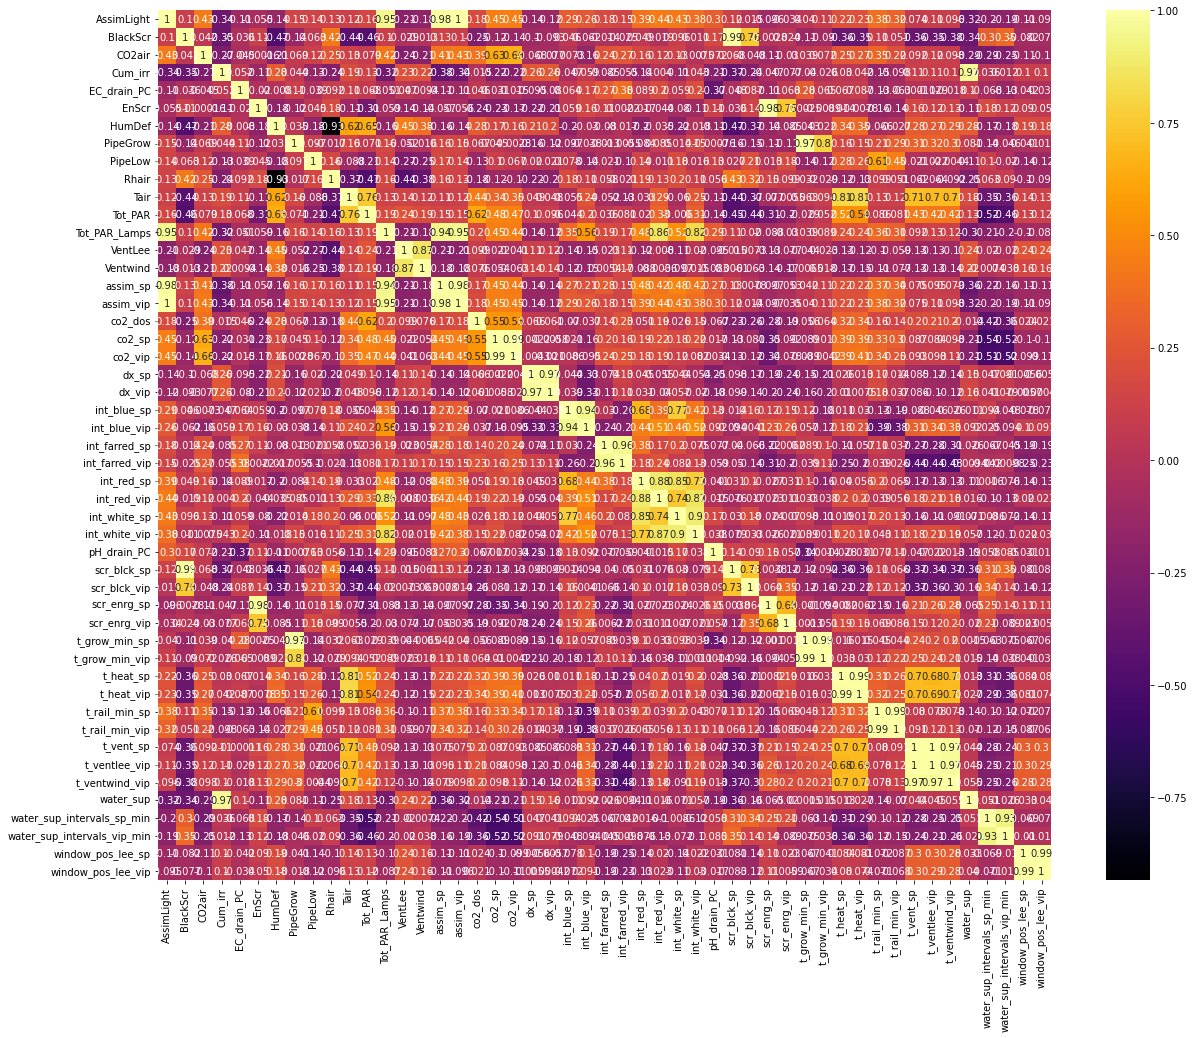

In [473]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

<Figure size 720x432 with 0 Axes>

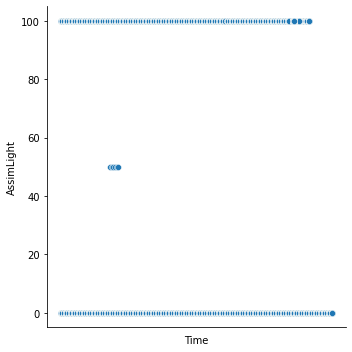

<Figure size 720x432 with 0 Axes>

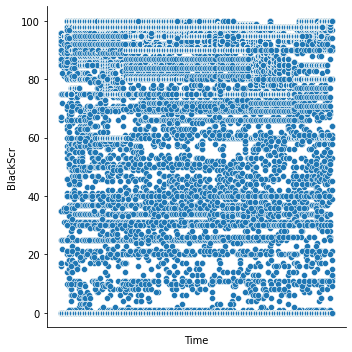

<Figure size 720x432 with 0 Axes>

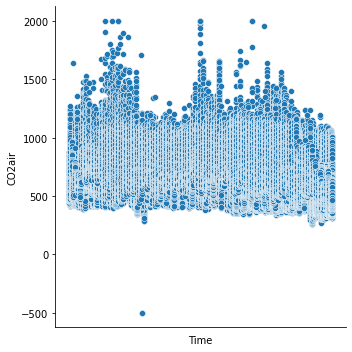

<Figure size 720x432 with 0 Axes>

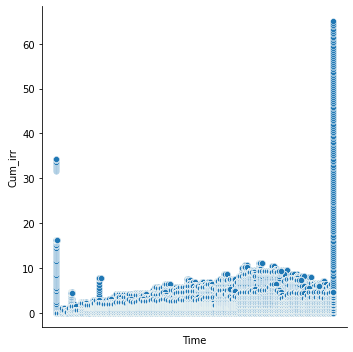

<Figure size 720x432 with 0 Axes>

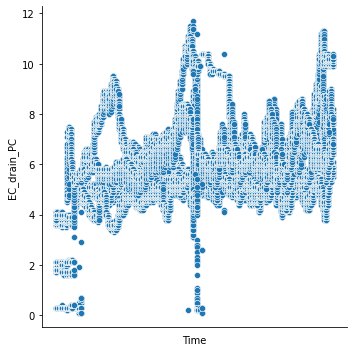

<Figure size 720x432 with 0 Axes>

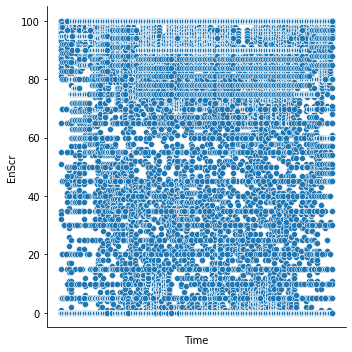

<Figure size 720x432 with 0 Axes>

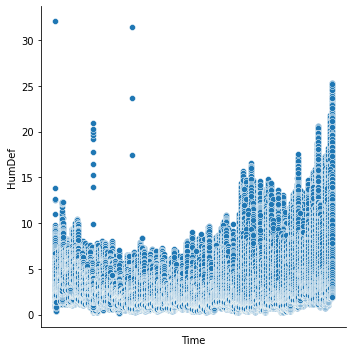

<Figure size 720x432 with 0 Axes>

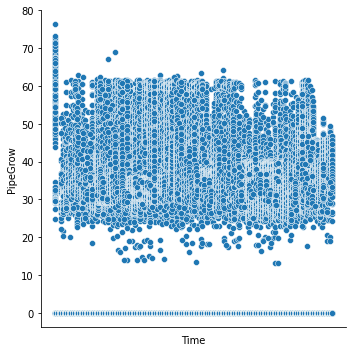

<Figure size 720x432 with 0 Axes>

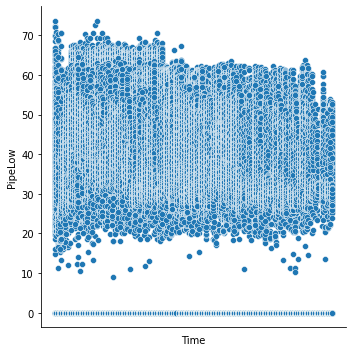

<Figure size 720x432 with 0 Axes>

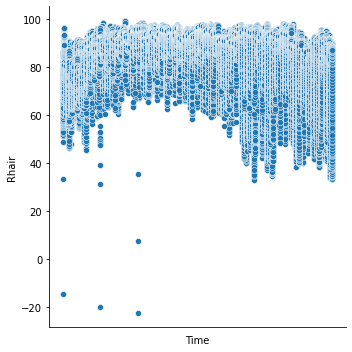

<Figure size 720x432 with 0 Axes>

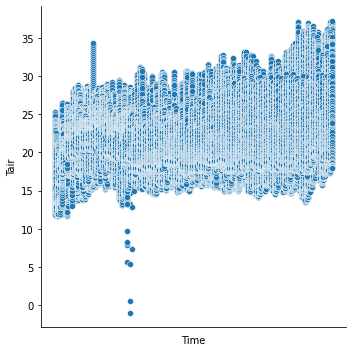

<Figure size 720x432 with 0 Axes>

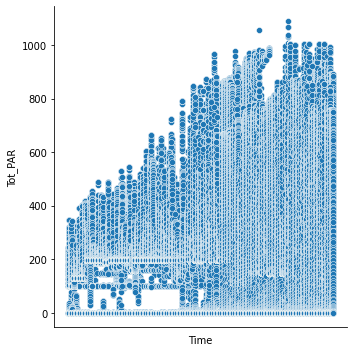

<Figure size 720x432 with 0 Axes>

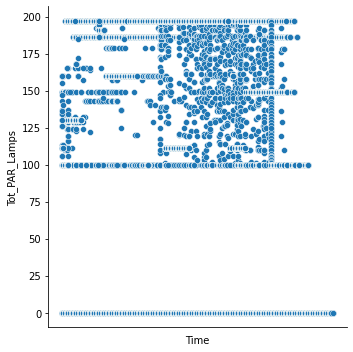

<Figure size 720x432 with 0 Axes>

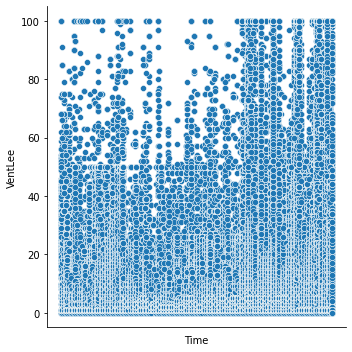

<Figure size 720x432 with 0 Axes>

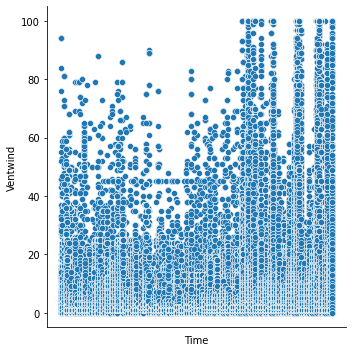

<Figure size 720x432 with 0 Axes>

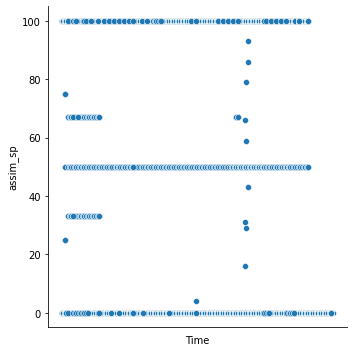

<Figure size 720x432 with 0 Axes>

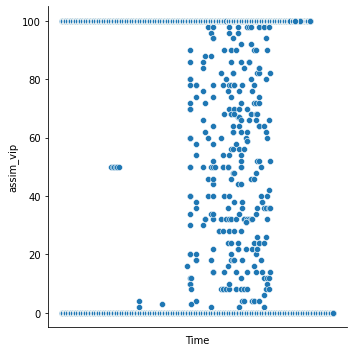

<Figure size 720x432 with 0 Axes>

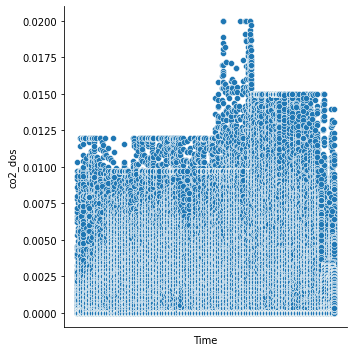

<Figure size 720x432 with 0 Axes>

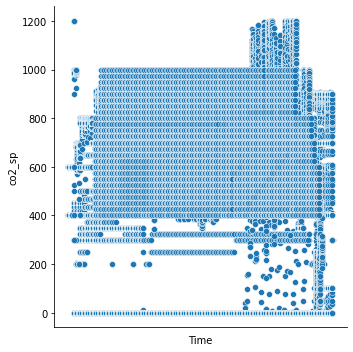

<Figure size 720x432 with 0 Axes>

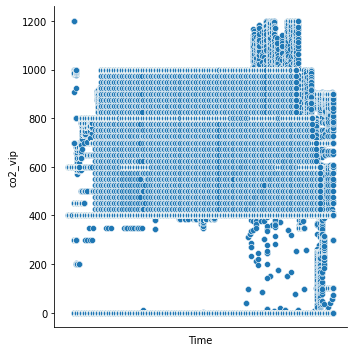

<Figure size 720x432 with 0 Axes>

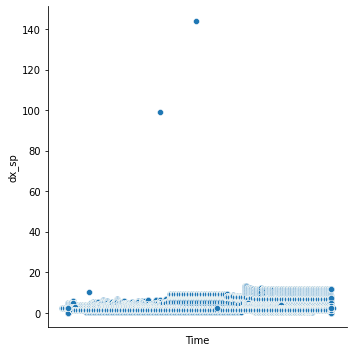

<Figure size 720x432 with 0 Axes>

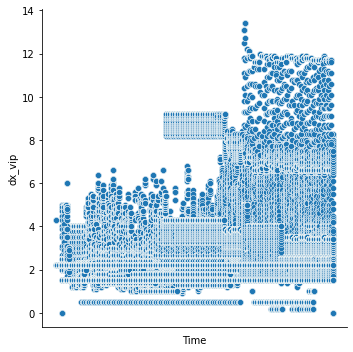

<Figure size 720x432 with 0 Axes>

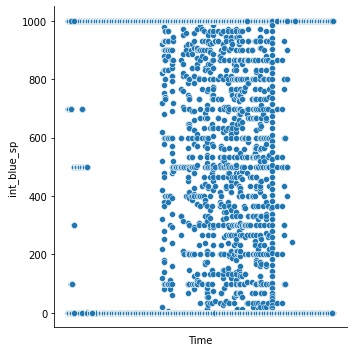

<Figure size 720x432 with 0 Axes>

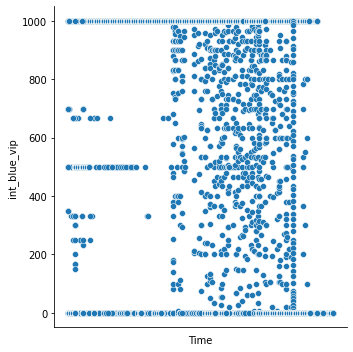

<Figure size 720x432 with 0 Axes>

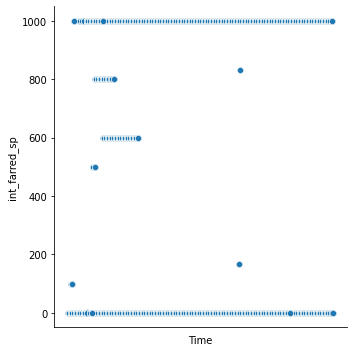

<Figure size 720x432 with 0 Axes>

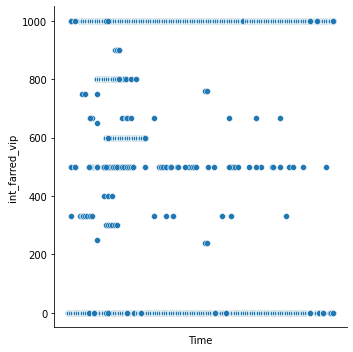

<Figure size 720x432 with 0 Axes>

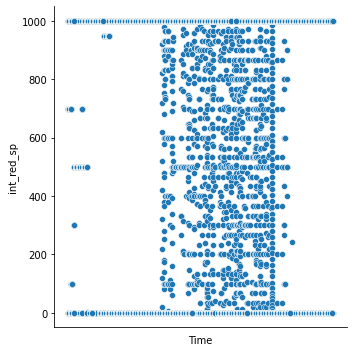

<Figure size 720x432 with 0 Axes>

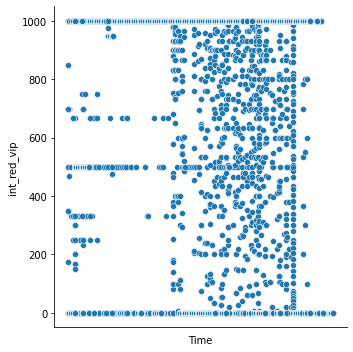

<Figure size 720x432 with 0 Axes>

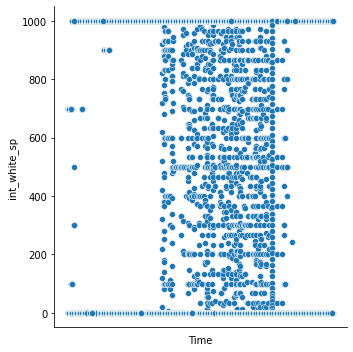

<Figure size 720x432 with 0 Axes>

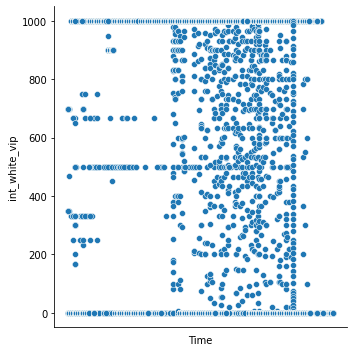

<Figure size 720x432 with 0 Axes>

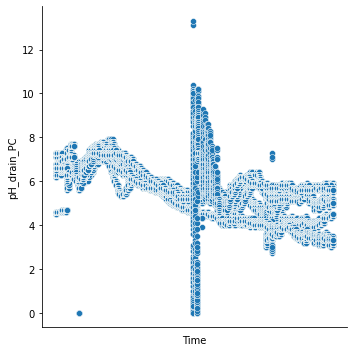

<Figure size 720x432 with 0 Axes>

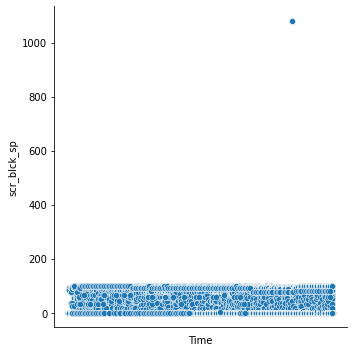

<Figure size 720x432 with 0 Axes>

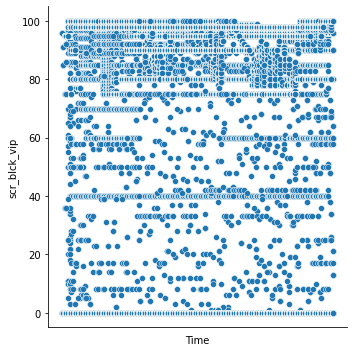

<Figure size 720x432 with 0 Axes>

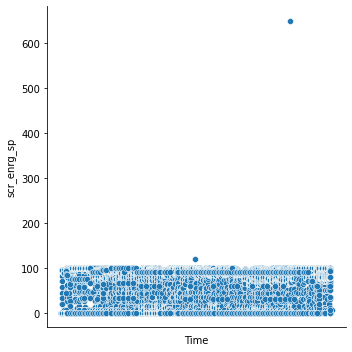

<Figure size 720x432 with 0 Axes>

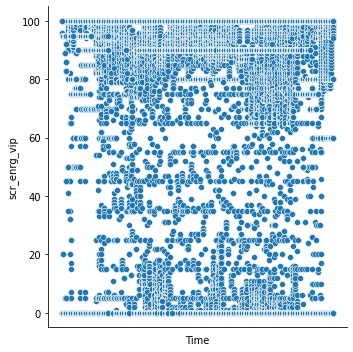

<Figure size 720x432 with 0 Axes>

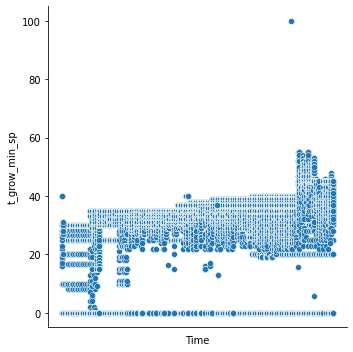

<Figure size 720x432 with 0 Axes>

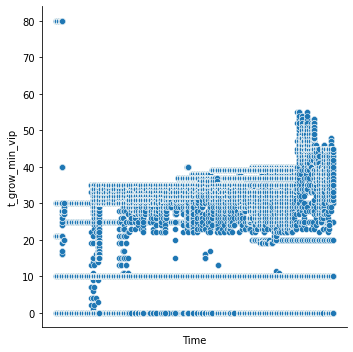

<Figure size 720x432 with 0 Axes>

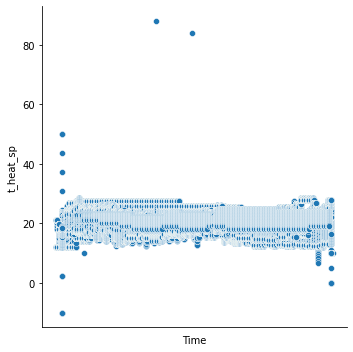

<Figure size 720x432 with 0 Axes>

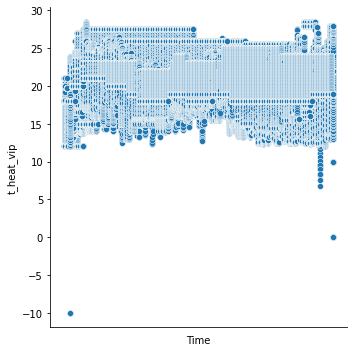

<Figure size 720x432 with 0 Axes>

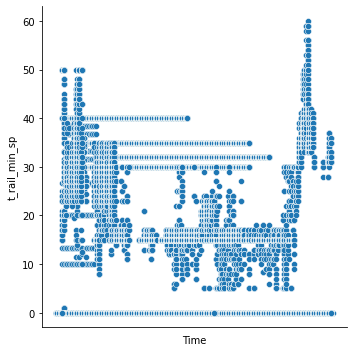

<Figure size 720x432 with 0 Axes>

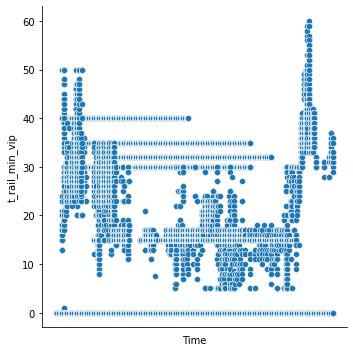

<Figure size 720x432 with 0 Axes>

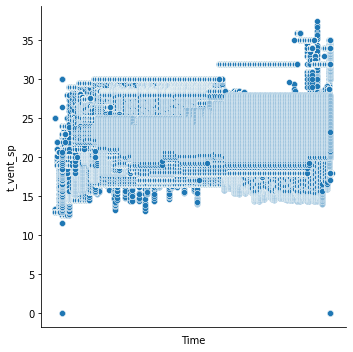

<Figure size 720x432 with 0 Axes>

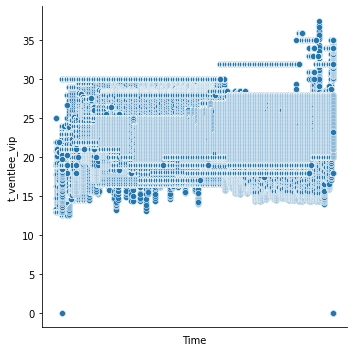

<Figure size 720x432 with 0 Axes>

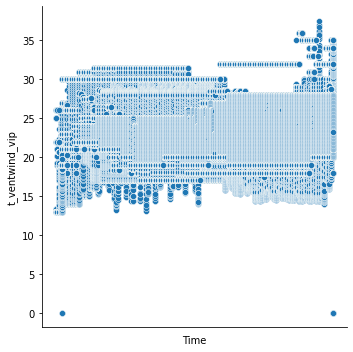

<Figure size 720x432 with 0 Axes>

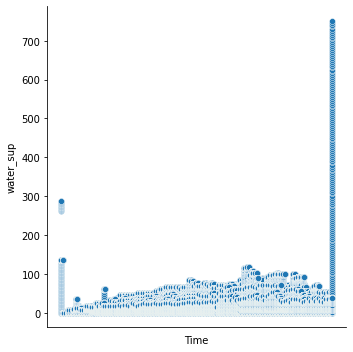

<Figure size 720x432 with 0 Axes>

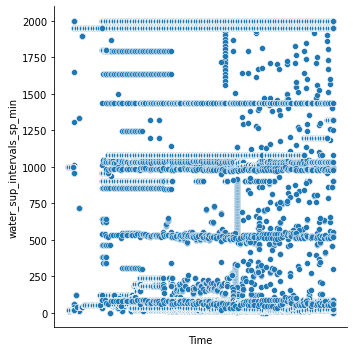

<Figure size 720x432 with 0 Axes>

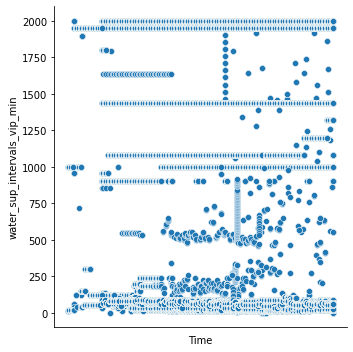

<Figure size 720x432 with 0 Axes>

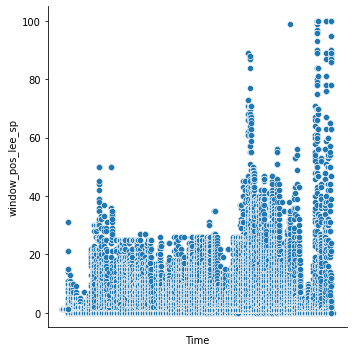

<Figure size 720x432 with 0 Axes>

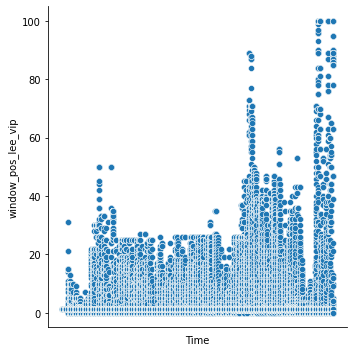

In [476]:
for i in res_grhc:
    plt.figure(figsize=(10,6))
    sns.relplot(x='Time',y=i,data=grhc_df)

<Figure size 720x432 with 0 Axes>

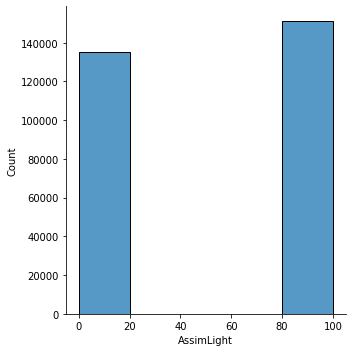

<Figure size 720x432 with 0 Axes>

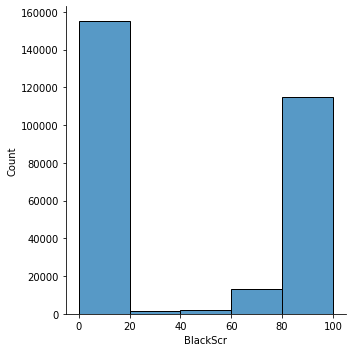

<Figure size 720x432 with 0 Axes>

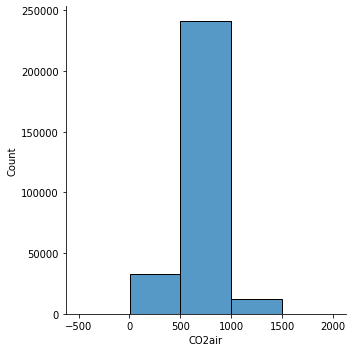

<Figure size 720x432 with 0 Axes>

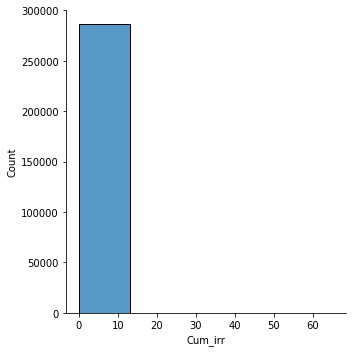

<Figure size 720x432 with 0 Axes>

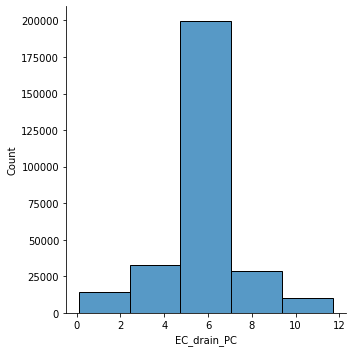

<Figure size 720x432 with 0 Axes>

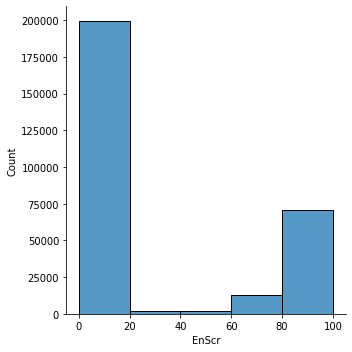

<Figure size 720x432 with 0 Axes>

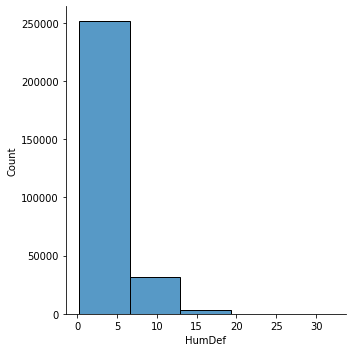

<Figure size 720x432 with 0 Axes>

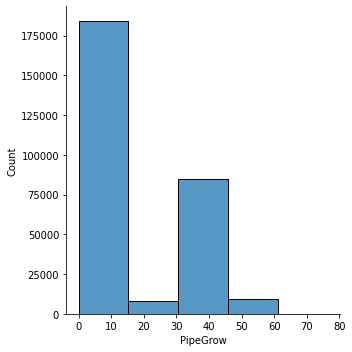

<Figure size 720x432 with 0 Axes>

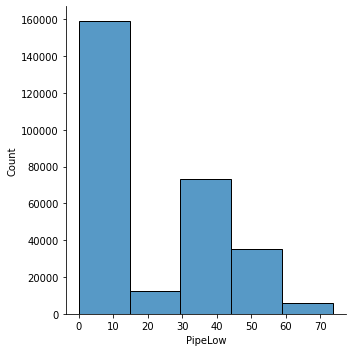

<Figure size 720x432 with 0 Axes>

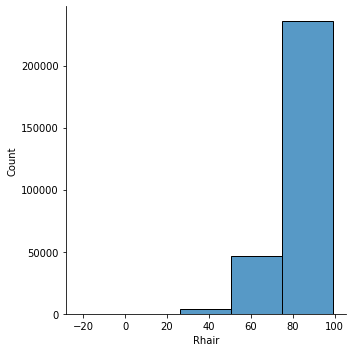

<Figure size 720x432 with 0 Axes>

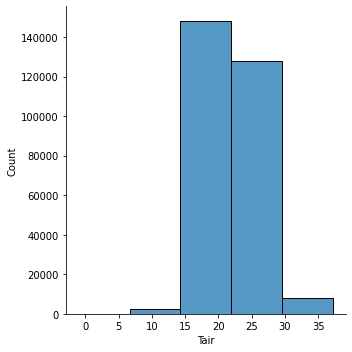

<Figure size 720x432 with 0 Axes>

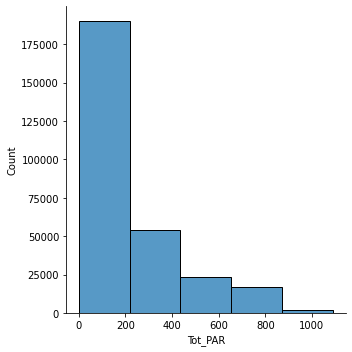

<Figure size 720x432 with 0 Axes>

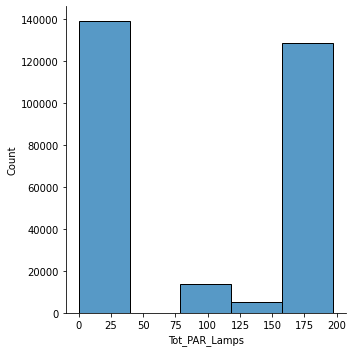

<Figure size 720x432 with 0 Axes>

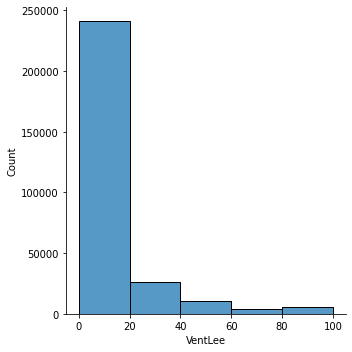

<Figure size 720x432 with 0 Axes>

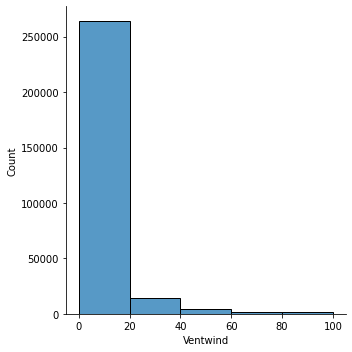

<Figure size 720x432 with 0 Axes>

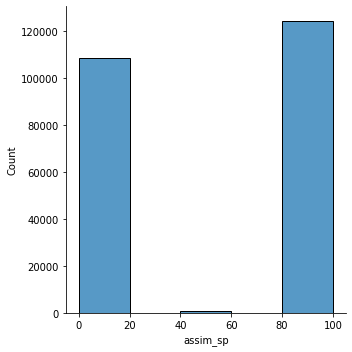

<Figure size 720x432 with 0 Axes>

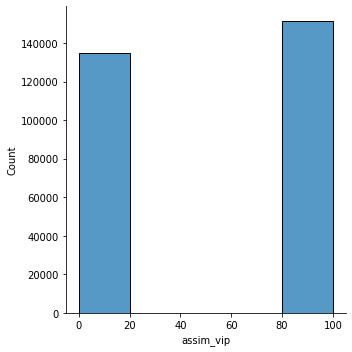

<Figure size 720x432 with 0 Axes>

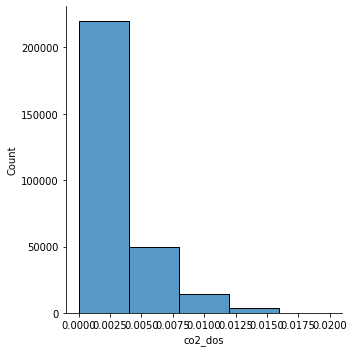

<Figure size 720x432 with 0 Axes>

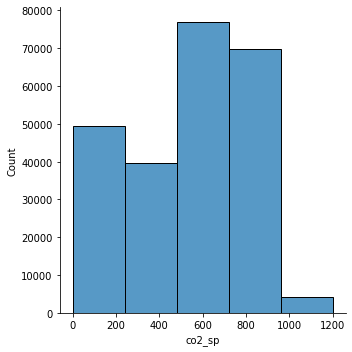

<Figure size 720x432 with 0 Axes>

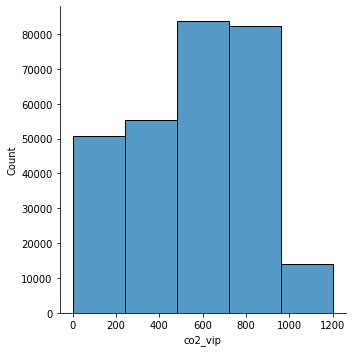

<Figure size 720x432 with 0 Axes>

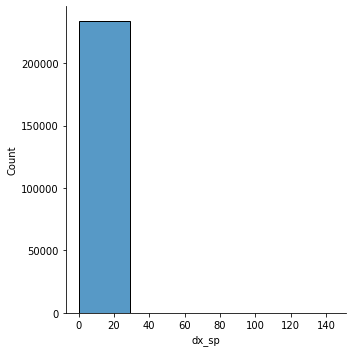

<Figure size 720x432 with 0 Axes>

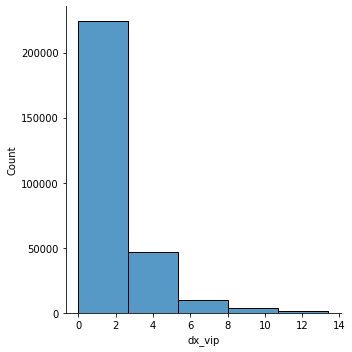

<Figure size 720x432 with 0 Axes>

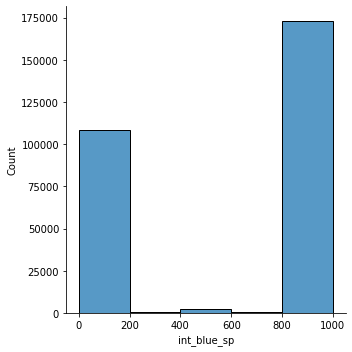

<Figure size 720x432 with 0 Axes>

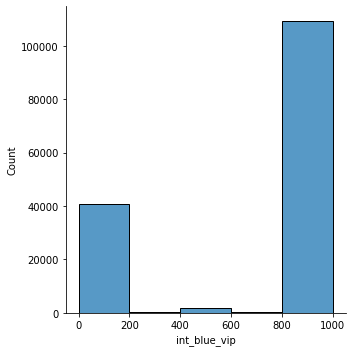

<Figure size 720x432 with 0 Axes>

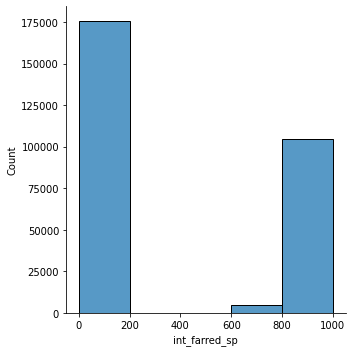

<Figure size 720x432 with 0 Axes>

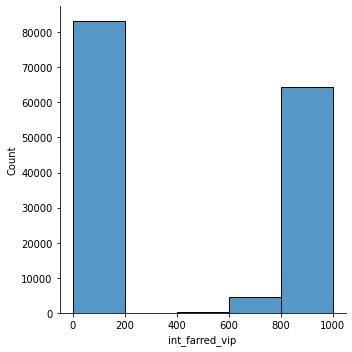

<Figure size 720x432 with 0 Axes>

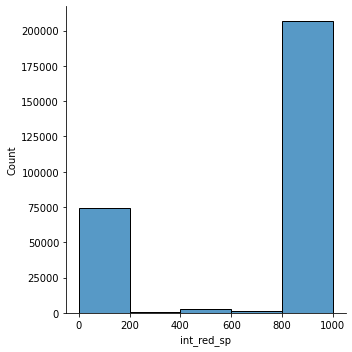

<Figure size 720x432 with 0 Axes>

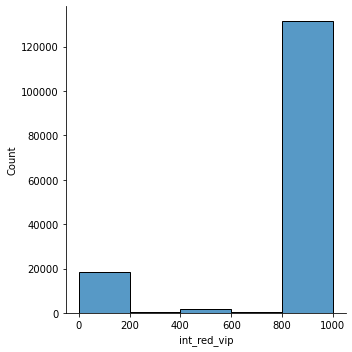

<Figure size 720x432 with 0 Axes>

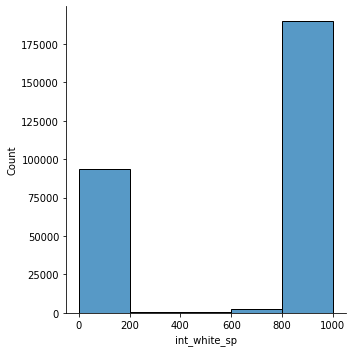

<Figure size 720x432 with 0 Axes>

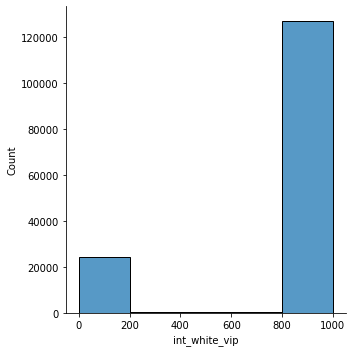

<Figure size 720x432 with 0 Axes>

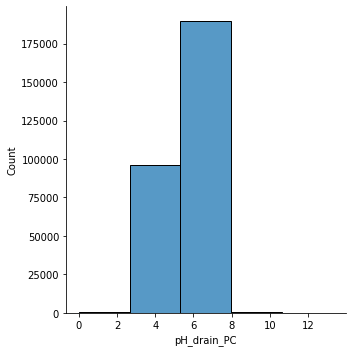

<Figure size 720x432 with 0 Axes>

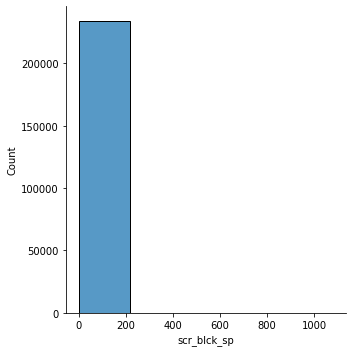

<Figure size 720x432 with 0 Axes>

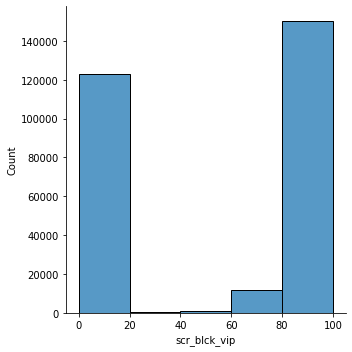

<Figure size 720x432 with 0 Axes>

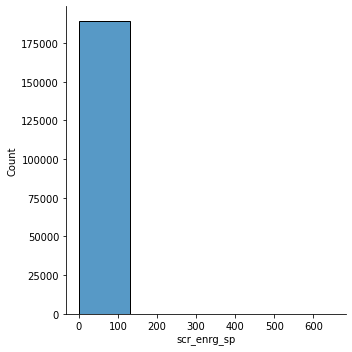

<Figure size 720x432 with 0 Axes>

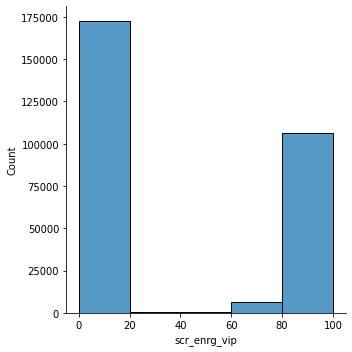

<Figure size 720x432 with 0 Axes>

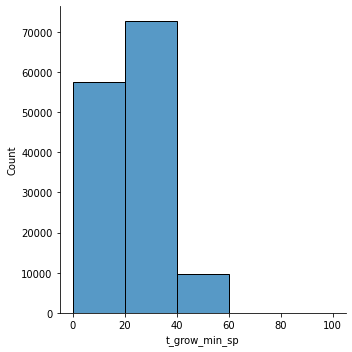

<Figure size 720x432 with 0 Axes>

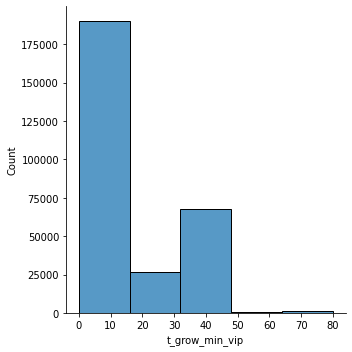

<Figure size 720x432 with 0 Axes>

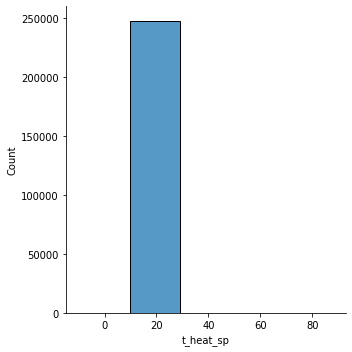

<Figure size 720x432 with 0 Axes>

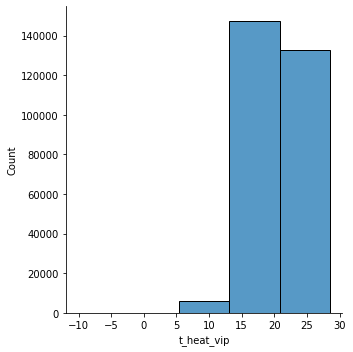

<Figure size 720x432 with 0 Axes>

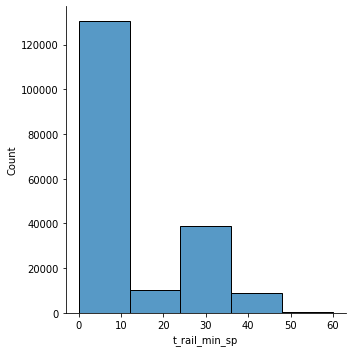

<Figure size 720x432 with 0 Axes>

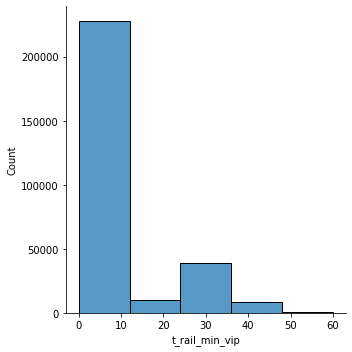

<Figure size 720x432 with 0 Axes>

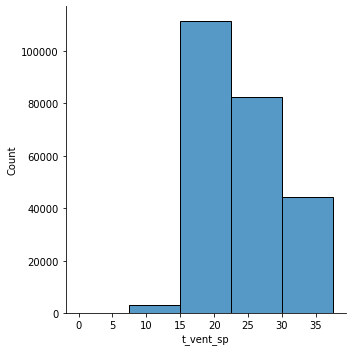

<Figure size 720x432 with 0 Axes>

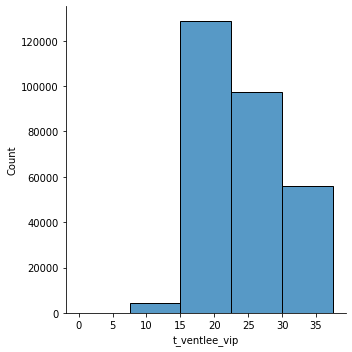

<Figure size 720x432 with 0 Axes>

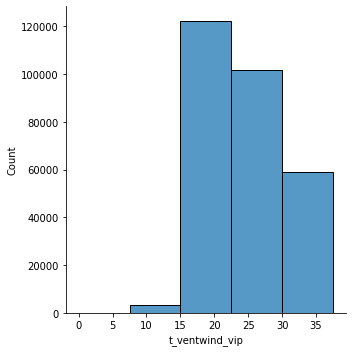

<Figure size 720x432 with 0 Axes>

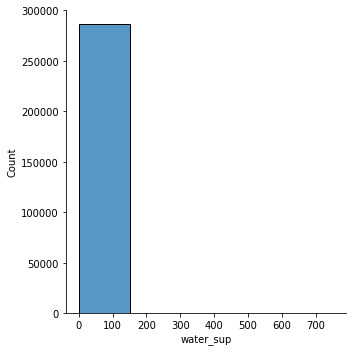

<Figure size 720x432 with 0 Axes>

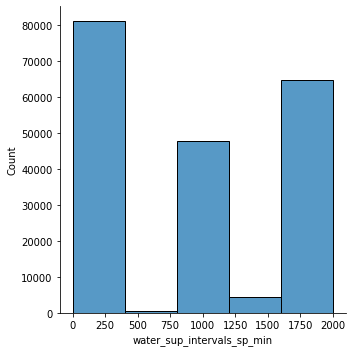

<Figure size 720x432 with 0 Axes>

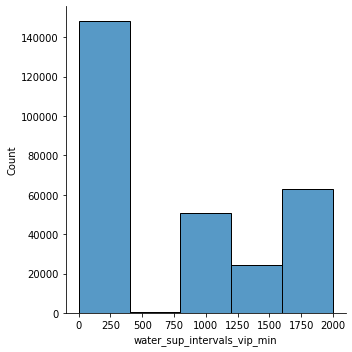

<Figure size 720x432 with 0 Axes>

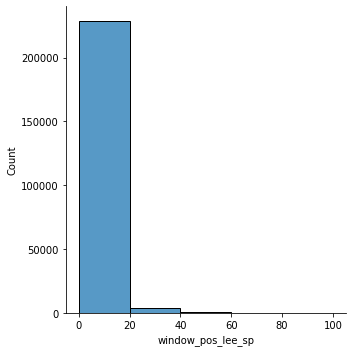

<Figure size 720x432 with 0 Axes>

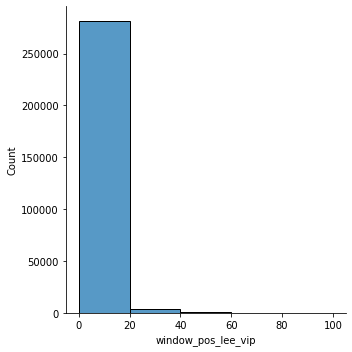

In [475]:
for i in res_grhc:
    plt.figure(figsize=(10,6))
    sns.displot(grhc_df[i],bins=5)